In [6]:
#Dimensionality reduction,Clustering and nearest neighbors of peptide reads
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv('mhc_train.csv')
lines=list(df['sequence'])

In [10]:
import scipy.io

from numpy import argmax

X=[]

for i in range(0,len(lines)):
    
    data=lines[i]
    alphabet = 'ARNDCQEGHILKMFPSTWYVX'
# define a mapping of chars to integers
    char_to_int = dict((c, i) for i, c in enumerate(alphabet))
    int_to_char = dict((i, c) for i, c in enumerate(alphabet))
# integer encode input data
    integer_encoded = [char_to_int[char] for char in data]
    X.append(integer_encoded)

X=np.array(X)  

array([[ 0,  0,  3, ...,  9,  0,  1],
       [ 0,  0,  3, ...,  0,  0, 18],
       [ 0,  0,  3, ..., 16, 15, 18],
       ...,
       [18,  1, 18, ...,  0,  2, 13],
       [18,  1, 18, ..., 19, 12,  6],
       [12,  5, 10, ..., 17, 10, 10]])

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

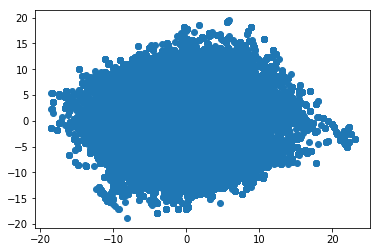

In [17]:
import matplotlib.pyplot as plt
plt.scatter(principalComponents[:,0],principalComponents[:,1])


In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(principalComponents)
kmeans.labels_

(90850,)

In [26]:
kmeans.cluster_centers_

array([[-6.45325069,  2.26459329],
       [-1.68785993, -6.32977876],
       [ 7.49819902, -1.99992086],
       [ 2.30955256,  6.51315857]])

In [34]:
idx=lines.index('AAVDLSHFL')

kmeans.labels_[idx]


3

In [41]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(principalComponents)

In [42]:
distances, indices = nbrs.kneighbors(principalComponents)

In [43]:
indices

array([[    0, 12449, 61474],
       [    1, 34076, 28705],
       [    2, 52456, 24102],
       ...,
       [57688, 16322, 88200],
       [83949, 90848, 73567],
       [90849, 60200, 24054]])